# Deep Learning Project - Template for test accuracy

In [63]:
import numpy as np
import pandas as pd
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import matplotlib.pyplot as plt

## Visualising the class distribution of the test set

In [71]:
gt_test = pd.read_csv('/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder/gt_test.csv', delimiter = ';')
gt_test

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000.ppm,53,54,6,5,48,49,16
1,00001.ppm,42,45,5,5,36,40,1
2,00002.ppm,48,52,6,6,43,47,38
3,00003.ppm,27,29,5,5,22,24,33
4,00004.ppm,60,57,5,5,55,52,11
...,...,...,...,...,...,...,...,...
12625,12625.ppm,42,41,5,6,37,36,12
12626,12626.ppm,50,51,6,5,45,46,33
12627,12627.ppm,29,29,6,6,24,24,6
12628,12628.ppm,48,49,5,6,43,44,7


In [72]:
# Retrieve last column
class_ids = gt_test['ClassId']
# Count and rename
class_counts = class_ids.value_counts().reset_index().rename(columns={'index':'class', 'ClassId':'count'})
# Sort
class_counts.sort_values(by='class', axis=0)

,class,count
37,0,60
1,1,720
0,2,750
11,3,450
6,4,660
7,5,630
22,6,150
12,7,450
10,8,450
8,9,480


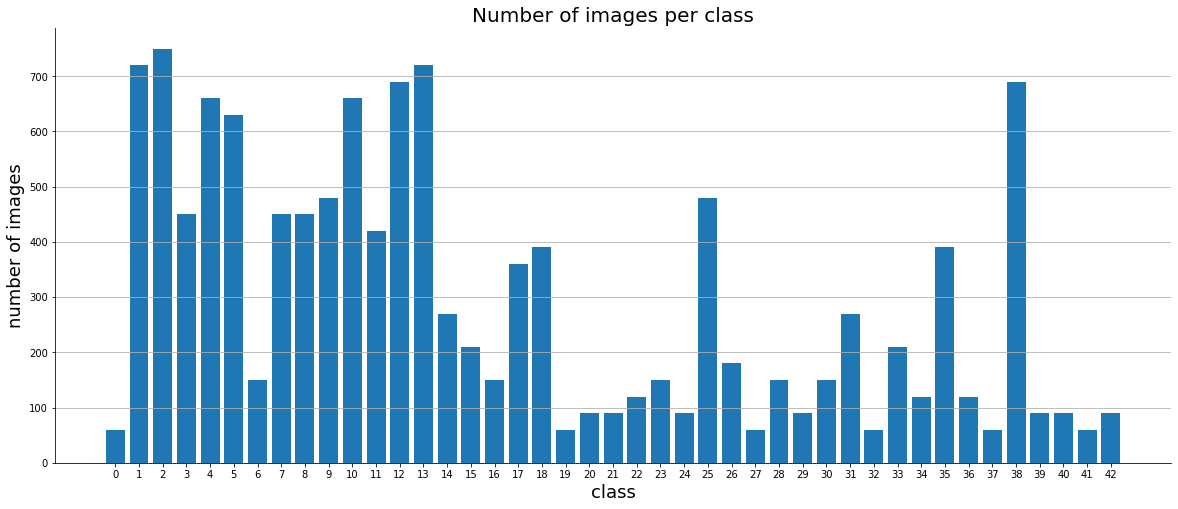

In [73]:
#displaying the number of images per class visually

plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots()
plt.bar(class_counts['class'], class_counts['count'])
plt.title("Number of images per class", fontsize=20)
plt.xlabel('class', fontsize=18)
plt.ylabel('number of images', fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(class_counts['class'])
plt.grid(axis="y")
plt.show()

## Predicting test set images

### 'All data'

#### For model that was trained for 15 epochs

In [105]:
# Load a saved model
model = keras.models.load_model('model_all_data_15_epochs_dropout_0_9')

In [106]:
# test_dir = "/Users/franz/Desktop/DL Project/Test Folder/"
test_dir = '/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode=None)

test_generator.reset() 
pred_scores = model.predict_generator(test_generator)
class_pred = np.argmax(pred_scores, axis=-1)

Found 12630 images belonging to 1 classes.


/Users/philippmetzger/anaconda3/envs/dl_pip_2/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [107]:
# Get the true values and compute accuracy

class_true = pd.read_csv("/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder/gt_test.csv", ";")["ClassId"]

print("Test set accuracy:", accuracy_score(class_pred, class_true))

Test set accuracy: 0.8699920823436262


In [ ]:
# Compute confusion matrix

#!pip install git+http://github.com/scikit-learn/scikit-learn.git

# multilabel_confusion_matrix(class_pred, class_true)
cm = pd.DataFrame(confusion_matrix(class_true, class_pred))

In [ ]:
# Double check accuracy
#np.trace(cm) / cm.sum().sum()

In [ ]:
# Save the confusion matrix to an excel file
cm.to_excel('cm_all_data_dropout_0_9_15_epochs.xlsx')

#### For model that was trained for 20 epochs

In [108]:
# Load a saved model
model = keras.models.load_model('model_all_data_20_epochs_dropout_0_9')

In [109]:
# test_dir = "/Users/franz/Desktop/DL Project/Test Folder/"
test_dir = '/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode=None)

test_generator.reset() 
pred_scores = model.predict_generator(test_generator)
class_pred = np.argmax(pred_scores, axis=-1)

Found 12630 images belonging to 1 classes.


/Users/philippmetzger/anaconda3/envs/dl_pip_2/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [110]:
# Get the true values and compute accuracy

class_true = pd.read_csv("/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder/gt_test.csv", ";")["ClassId"]

print("Test set accuracy:", accuracy_score(class_pred, class_true))

Test set accuracy: 0.8693586698337292


In [ ]:
# Compute confusion matrix

#!pip install git+http://github.com/scikit-learn/scikit-learn.git

# multilabel_confusion_matrix(class_pred, class_true)
cm = pd.DataFrame(confusion_matrix(class_true, class_pred))

In [ ]:
# Double check accuracy
#np.trace(cm) / cm.sum().sum()

In [ ]:
# Save the confusion matrix to an excel file
cm.to_excel('cm_all_data_dropout_0_9_20_epochs.xlsx')

## Analysing the results

In [2]:
res = pd.read_csv("cm_all_data_dropout_0_9_20_epochs.csv", ";").drop(columns="Unnamed: 0")
number_per_class = res.sum(axis=1)

true_pos = []
for i in range(43):
    true_pos.append(res.iloc[i,i])

analysis = pd.DataFrame(true_pos, number_per_class).reset_index().rename(columns={"index":"actual_number", 0:"true_positives"})
analysis["acc"] = analysis["true_positives"] / analysis["actual_number"]

In [3]:
#setting the training directory (the training images can be found there, already sorted by class into folders)
base_training_dir = "/Users/franz/Desktop/DL Project/Train/Final_Training/Images"

#setting the directory where the selected training and validation images will be stored in
created_dir = "/Users/franz/Desktop/DL Project/Selected"

#storing all the folder names that belong to the respective classes
all_classes = sorted(i for i in os.listdir(base_training_dir) if i.startswith("0"))

In [4]:
#getting the number of images within each class of the training data
amount_per_class = {}

for i in range(len(all_classes)):
    directory = base_training_dir + "/" + all_classes[i]
    amount_per_class[i] = len(sorted(i for i in os.listdir(directory) if i.startswith("0")))

amount_per_class_df = pd.DataFrame.from_dict(amount_per_class, orient='index').rename(columns={0:"amount"})
amount_per_class_df.index.name = 'class'

In [6]:
res = pd.concat([analysis, amount_per_class_df],axis = 1).rename(columns={"amount":"class_size_in_training"})
res.to_excel('cm_all_data_dropout_0_9_20_epochs_analysed.xlsx')
res

,actual_number,true_positives,acc,class_size_in_training
0,60,21,0.350000,210
1,720,675,0.937500,2220
2,750,657,0.876000,2250
3,450,351,0.780000,1410
4,660,582,0.881818,1980
5,630,509,0.807937,1860
6,150,106,0.706667,420
7,450,329,0.731111,1440
8,450,364,0.808889,1410
9,480,462,0.962500,1470


In [ ]:
res.corr()

### 'Weighted 1'

In [98]:
accs = {}

#### 5 epochs

In [99]:
# Provide the name of this model
name = '_all_data_dropout_0_9_weights_5_epochs'

# Load a saved model
model = keras.models.load_model('model' + name)

# Define the test set directory
#test_dir = "/Users/franz/Desktop/DL Project/Test Folder/"
test_dir = '/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder'

# Define the generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode=None)
test_generator.reset()

# Predict
pred_scores = model.predict_generator(test_generator)
class_pred = np.argmax(pred_scores, axis=-1)


# Get the true values and compute, save and print accuracy
class_true = pd.read_csv("/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder/gt_test.csv", ";")["ClassId"]
acc = accuracy_score(class_pred, class_true)
accs[name] = acc
print("Test set accuracy:", acc)

# Get the confusion matrix
cm = pd.DataFrame(confusion_matrix(class_true, class_pred))

# Double check accuracy
#print('Accuracy double checked:', np.trace(cm) / cm.sum().sum())

# Print the confusion matrix and save it to an excel file
save_path = 'cm' + name + '.xlsx'
cm.to_excel(save_path)

Found 12630 images belonging to 1 classes.
Test set accuracy: 0.8235946159936659
Accuracy double checked: 0.8235946159936659


#### 10 epochs

In [100]:
# Provide the name of this model
name = '_all_data_dropout_0_9_weights_10_epochs'

# Load a saved model
model = keras.models.load_model('model' + name)

# Define the test set directory
#test_dir = "/Users/franz/Desktop/DL Project/Test Folder/"
test_dir = '/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder'

# Define the generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode=None)
test_generator.reset()

# Predict
pred_scores = model.predict_generator(test_generator)
class_pred = np.argmax(pred_scores, axis=-1)


# Get the true values and compute, save and print accuracy
class_true = pd.read_csv("/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder/gt_test.csv", ";")["ClassId"]
acc = accuracy_score(class_pred, class_true)
accs[name] = acc
print("Test set accuracy:", acc)

# Get the confusion matrix
cm = pd.DataFrame(confusion_matrix(class_true, class_pred))

# Double check accuracy
#print('Accuracy double checked:', np.trace(cm) / cm.sum().sum())

# Print the confusion matrix and save it to an excel file
save_path = 'cm' + name + '.xlsx'
cm.to_excel(save_path)

Found 12630 images belonging to 1 classes.


/Users/philippmetzger/anaconda3/envs/dl_pip_2/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Test set accuracy: 0.8517022961203484
Accuracy double checked: 0.8517022961203484


#### 15 epochs

In [101]:
# Provide the name of this model
name = '_all_data_dropout_0_9_weights_15_epochs'

# Load a saved model
model = keras.models.load_model('model' + name)

# Define the test set directory
#test_dir = "/Users/franz/Desktop/DL Project/Test Folder/"
test_dir = '/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder'

# Define the generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode=None)
test_generator.reset()

# Predict
pred_scores = model.predict_generator(test_generator)
class_pred = np.argmax(pred_scores, axis=-1)


# Get the true values and compute, save and print accuracy
class_true = pd.read_csv("/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder/gt_test.csv", ";")["ClassId"]
acc = accuracy_score(class_pred, class_true)
accs[name] = acc
print("Test set accuracy:", acc)

# Get the confusion matrix
cm = pd.DataFrame(confusion_matrix(class_true, class_pred))

# Double check accuracy
#print('Accuracy double checked:', np.trace(cm) / cm.sum().sum())

# Print the confusion matrix and save it to an excel file
save_path = 'cm' + name + '.xlsx'
cm.to_excel(save_path)

Found 12630 images belonging to 1 classes.


/Users/philippmetzger/anaconda3/envs/dl_pip_2/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Test set accuracy: 0.8586698337292161
Accuracy double checked: 0.8586698337292161


#### 20 epochs

In [102]:
# Provide the name of this model
name = '_all_data_dropout_0_9_weights_20_epochs'

# Load a saved model
model = keras.models.load_model('model' + name)

# Define the test set directory
#test_dir = "/Users/franz/Desktop/DL Project/Test Folder/"
test_dir = '/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder'

# Define the generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode=None)
test_generator.reset()

# Predict
pred_scores = model.predict_generator(test_generator)
class_pred = np.argmax(pred_scores, axis=-1)


# Get the true values and compute, save and print accuracy
class_true = pd.read_csv("/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Test Folder/gt_test.csv", ";")["ClassId"]
acc = accuracy_score(class_pred, class_true)
accs[name] = acc
print("Test set accuracy:", acc)

# Get the confusion matrix
cm = pd.DataFrame(confusion_matrix(class_true, class_pred))

# Double check accuracy
#print('Accuracy double checked:', np.trace(cm) / cm.sum().sum())

# Print the confusion matrix and save it to an excel file
save_path = 'cm' + name + '.xlsx'
cm.to_excel(save_path)

Found 12630 images belonging to 1 classes.


/Users/philippmetzger/anaconda3/envs/dl_pip_2/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Test set accuracy: 0.8669833729216152
Accuracy double checked: 0.8669833729216152


In [103]:
accs

{'_all_data_dropout_0_9_weights_5_epochs': 0.8235946159936659,
 '_all_data_dropout_0_9_weights_10_epochs': 0.8517022961203484,
 '_all_data_dropout_0_9_weights_15_epochs': 0.8586698337292161,
 '_all_data_dropout_0_9_weights_20_epochs': 0.8669833729216152}